<a href="https://colab.research.google.com/github/shaon11579/DNN-fall-2021/blob/main/Assignment4_hasan_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load libraries

In [4]:

import collections
from tensorflow.keras.models import Sequential
import helper
import numpy as np
#import project_tests as tests
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,GRU,LSTM, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

# load data

In [1]:
with open("/content/small_vocab_en.txt") as f:
    english_sentences = f.readlines()

with open("/content/small_vocab_fr.txt") as f:
    french_sentences = f.readlines()

print('Dataset Loaded')

Dataset Loaded


#display sample


In [64]:
for sample_i in range(5):
    print('English sample {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('French sample {}:  {}\n'.format(sample_i + 1, french_sentences[sample_i]))

English sample 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .

French sample 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


English sample 2:  the united states is usually chilly during july , and it is usually freezing in november .

French sample 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


English sample 3:  california is usually quiet during march , and it is usually hot in june .

French sample 3:  california est généralement calme en mars , et il est généralement chaud en juin .


English sample 4:  the united states is sometimes mild during june , and it is cold in september .

French sample 4:  les états-unis est parfois légère en juin , et il fait froid en septembre .


English sample 5:  your least liked fruit is the grape , but my least liked is the apple .

French sample 5:  votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .




In [5]:
english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


# Processing through tokenization

In [6]:
def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    # TODO: Implement
    x_tk = Tokenizer(char_level = False)
    x_tk.fit_on_texts(x)
    return x_tk.texts_to_sequences(x), x_tk

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


# Padding

In [7]:

def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    if length is None:
        length = max([len(sentence) for sentence in x])
    return pad_sequences(x, maxlen = length, padding = 'post')

#tests.test_pad(pad)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


In [8]:

def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)
    
max_english_sequence_length = preproc_english_sentences.shape[1]
max_french_sequence_length = preproc_french_sentences.shape[1]
english_vocab_size = len(english_tokenizer.word_index)
french_vocab_size = len(french_tokenizer.word_index)

print('Data Preprocessed')
print("Max English sentence length:", max_english_sequence_length)
print("Max French sentence length:", max_french_sequence_length)
print("English vocabulary size:", english_vocab_size)
print("French vocabulary size:", french_vocab_size)

Data Preprocessed
Max English sentence length: 15
Max French sentence length: 21
English vocabulary size: 199
French vocabulary size: 344


# 1. Stacked (2-layer) RNN Implementation

In [9]:

def vanilla_rnn(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    #  Build the layers
    learning_rate = 1e-3
    input_seq = Input(input_shape[1:])
    
    rnn =SimpleRNN(50,return_sequences=True)(input_seq)
    rnn2=SimpleRNN(50,return_sequences=True)(rnn)
    logits = TimeDistributed(Dense(french_vocab_size))(rnn2)
    model = Model(input_seq, Activation('softmax')(logits))
    model.compile(loss = sparse_categorical_crossentropy, 
                 optimizer = Adam(learning_rate), 
                 metrics = ['accuracy'])
    
    return model



# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, max_french_sequence_length)
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))
print(tmp_x.shape[1:])

(21, 1)


In [10]:

def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


In [32]:
# Train the neural network
vanilla = vanilla_rnn(tmp_x.shape,max_french_sequence_length,english_vocab_size,french_vocab_size)

vanilla.summary()

history=vanilla.fit(tmp_x, preproc_french_sentences, batch_size=16, epochs=30, validation_split=0.2)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 21, 1)]           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 21, 50)            2600      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 21, 50)            5050      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 21, 344)           17544     
_________________________________________________________________
activation_2 (Activation)    (None, 21, 344)           0         
Total params: 25,194
Trainable params: 25,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
6893/6893 [==============================] - 151s 22ms/step - loss: 1.4601 - accuracy: 0.6176 - val_loss: nan 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


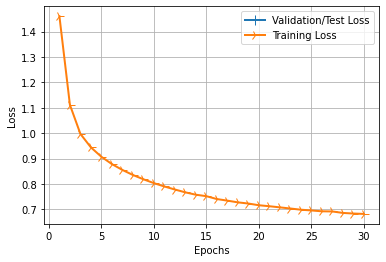

In [33]:
print(history.history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss.png', dpi = 1200)
plt.show()

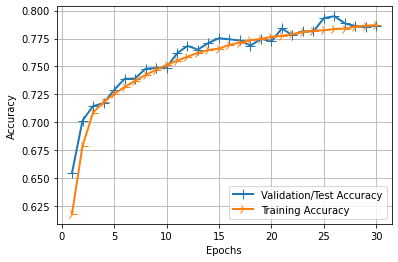

In [35]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('Accuracy.png', dpi = 1200)
plt.show()

In [36]:

example_eng= [eng.reshape(1,21,1) for eng in tmp_x[:10]]
french_preds=[vanilla.predict(sample) for sample in example_eng]

In [37]:
french_trans= [logits_to_text(np.concatenate(pred), french_tokenizer) for pred in french_preds]
# eng_sentenses= [logits_to_text(data[0], english_tokenizer) for pred in fres_preds]

In [38]:
french_trans

['new jersey est parfois chaud en mois de il est il en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'les états unis est généralement froid en juillet et il est généralement agréable en novembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 "californie est généralement calme en l' et il est généralement chaud en printemps <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>",
 'les états unis est parfois pluvieux en printemps et il est merveilleux en septembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'votre fruit aimé moins est la raisin mais mon moins aimé est la pomme <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'son fruit préféré est la pomme mais mon préféré est la raisin <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'paris est chaud au décembre mais il est généralement généralement en juillet <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'new jersey est occupé en printemps et il est jamais chaud en mars <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'notr

# 2. Stacked (2-layer) LSTM Implementation

In [19]:
def lstm_rnn(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Build the layers
    learning_rate = 1e-3
    input_seq = Input(input_shape[1:])
    
    rnn =LSTM(50,return_sequences=True)(input_seq)
    rnn2=LSTM(50,return_sequences=True)(rnn)
    logits = TimeDistributed(Dense(french_vocab_size))(rnn2)
    model = Model(input_seq, Activation('softmax')(logits))
    model.compile(loss = sparse_categorical_crossentropy, 
                 optimizer = Adam(learning_rate), 
                 metrics = ['accuracy'])
    
    return model


#tests.test_simple_model(simple_model)

# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, max_french_sequence_length)
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))
print(tmp_x.shape[1:])

(21, 1)


In [20]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


In [46]:
# Train the neural network
lstm = lstm_rnn(tmp_x.shape,max_french_sequence_length,english_vocab_size,french_vocab_size)

lstm.summary()

history=lstm.fit(tmp_x, preproc_french_sentences, batch_size=16, epochs=15, validation_split=0.2)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 21, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 21, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 21, 50)            20200     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 21, 344)           17544     
_________________________________________________________________
activation_4 (Activation)    (None, 21, 344)           0         
Total params: 48,144
Trainable params: 48,144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
6893/6893 [==============================] - 37s 5ms/step - loss: 1.5247 - accuracy: 0.6059 - val_loss: nan - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


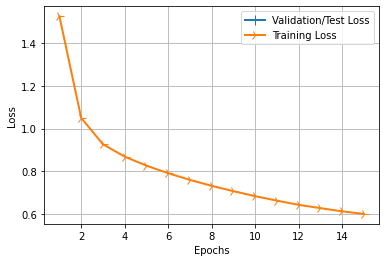

In [48]:
print(history.history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss.png', dpi = 1200)
plt.show()

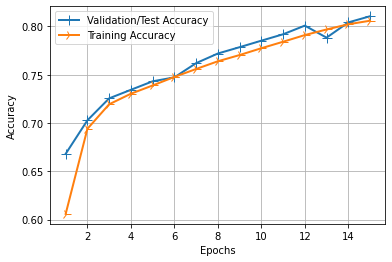

In [49]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('Accuracy.png', dpi = 1200)
plt.show()

# Please provide at least ten translations from English to French from each model in the report.

In [51]:
example_eng= [eng.reshape(1,21,1) for eng in tmp_x[:10]]
french_preds=[lstm.predict(sample) for sample in example_eng]

In [52]:
french_trans= [logits_to_text(np.concatenate(pred), french_tokenizer) for pred in french_preds]
# eng_sentenses= [logits_to_text(data[0], english_tokenizer) for pred in fres_preds]

In [55]:
french_trans

["new jersey est parfois chaud en l' de mai et il est avril en avril <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>",
 'les états unis est généralement froid en juillet et il est généralement en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 "californie est généralement chaud en l' et il est généralement chaud en chaud <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>",
 'les états unis est parfois doux en juin et il est froid en septembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'votre fruit aimé des est la raisin mais mon moins aimé est la pomme <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'son fruit préféré est la mais mais favori favori est la <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'paris est calme en décembre mais il est généralement froid en juillet <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'new jersey est occupé en printemps et il est jamais chaud en mars <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'notre fruit moins fruit est la citron mais

# 3. Stacked (2-layer) GRU Implementation

In [41]:
def gru_rnn(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Build the layers
    learning_rate = 1e-3
    input_seq = Input(input_shape[1:])
    
    rnn =GRU(50,return_sequences=True)(input_seq)
    rnn2=GRU(50,return_sequences=True)(rnn)
    logits = TimeDistributed(Dense(french_vocab_size))(rnn2)
    model = Model(input_seq, Activation('softmax')(logits))
    model.compile(loss = sparse_categorical_crossentropy, 
                 optimizer = Adam(learning_rate), 
                 metrics = ['accuracy'])
    
    return model


#tests.test_simple_model(simple_model)

# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, max_french_sequence_length)
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))
print(tmp_x.shape[1:])

(21, 1)


In [42]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


In [43]:
# Train the neural network
gru = gru_rnn(tmp_x.shape,max_french_sequence_length,english_vocab_size,french_vocab_size)

gru.summary()

history=gru.fit(tmp_x, preproc_french_sentences, batch_size=16, epochs=10, validation_split=0.2)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 21, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 21, 50)            7950      
_________________________________________________________________
gru_1 (GRU)                  (None, 21, 50)            15300     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 21, 344)           17544     
_________________________________________________________________
activation_3 (Activation)    (None, 21, 344)           0         
Total params: 40,794
Trainable params: 40,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6893/6893 [==============================] - 34s 5ms/step - loss: 1.4772 - accuracy: 0.6173 - val_loss: nan - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


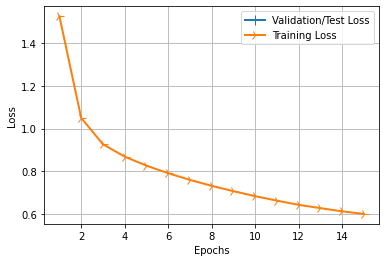

In [56]:
print(history.history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss.png', dpi = 1200)
plt.show()

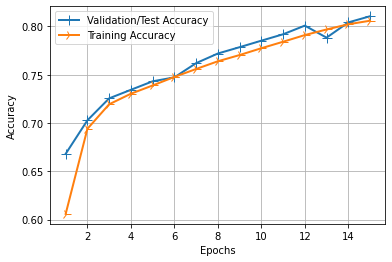

In [57]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('Accuracy.png', dpi = 1200)
plt.show()

# Please provide at least ten translations from English to French from each model in the report.

In [58]:
example_eng= [eng.reshape(1,21,1) for eng in tmp_x[:10]]
french_preds=[gru.predict(sample) for sample in example_eng]

In [59]:
french_trans= [logits_to_text(np.concatenate(pred), french_tokenizer) for pred in french_preds]
# eng_sentenses= [logits_to_text(data[0], english_tokenizer) for pred in fres_preds]

In [63]:
french_trans

['new jersey est parfois calme en mois de il et il est en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'les états unis est généralement pluvieux en juillet et il est généralement agréable en novembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 "californie est généralement habituellement en l' et il est généralement habituellement en calme <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>",
 'les états unis est parfois humide en juin et il est froid en septembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'elle fruit aimé moins est la pomme mais mon moins aimé est la pomme <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'son fruit préféré est la pomme mais mon préféré est la <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'paris est relaxant en décembre mais il est généralement froid en juillet <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'new jersey est froid en printemps et il est jamais tranquille en mars <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'notre 